In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('aggregated_building_areas_wasilla.csv')

# Filter out rows where 'footprint' is NaN or 0
df_filtered = df.dropna(subset=['LVNG_GRG_SUM'])
df_filtered = df_filtered[df_filtered['LVNG_GRG_SUM'] > 0]

# Sort the data by 'footprint' from smallest to largest
df_sorted = df_filtered.sort_values(by='LVNG_GRG_SUM')

total_buildings = len(df_sorted)

print(f'Total number of buildings: {total_buildings}')

Total number of buildings: 21340


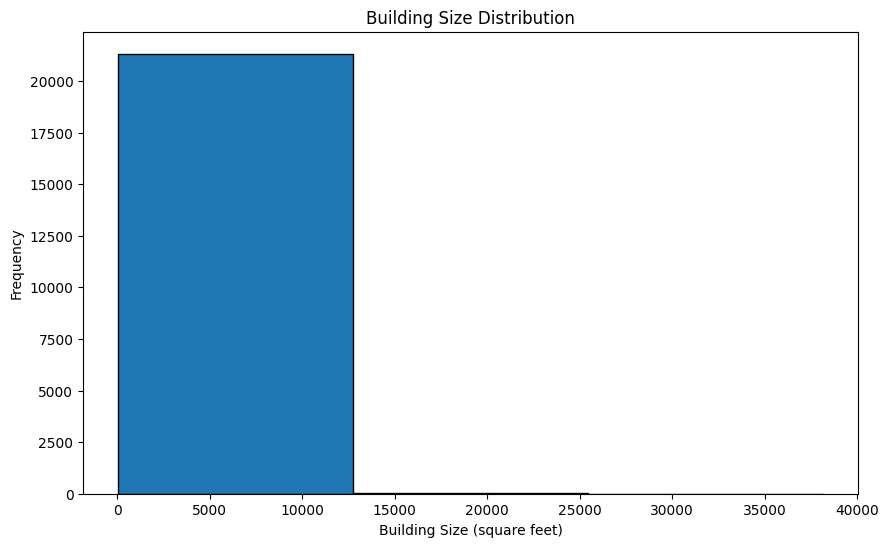

In [3]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_sorted['LVNG_GRG_SUM'], bins=3, edgecolor='black')
plt.title('Building Size Distribution')
plt.xlabel('Building Size (square feet)')
plt.ylabel('Frequency')
plt.show()

In [4]:
import numpy as np

# Calculate histogram and bin edges
counts, bin_edges = np.histogram(df_sorted['LVNG_GRG_SUM'], bins=3)

# Initialize list to store averages
bin_averages = []

# Calculate average for each bin
for i in range(len(bin_edges)-1):
    # Filter data for this bin
    bin_filter = (df_sorted['LVNG_GRG_SUM'] >= bin_edges[i]) & (df_sorted['LVNG_GRG_SUM'] < bin_edges[i+1])
    bin_data = df_sorted[bin_filter]
    
    # Calculate and store average
    avg = bin_data['LVNG_GRG_SUM'].mean()
    bin_averages.append(avg)

    # Print number of buildings and average size for each bin
    print(f'Bin {i+1}:')
    print(f'  Number of buildings: {counts[i]}')
    print(f'  Average building size: {avg}')

Bin 1:
  Number of buildings: 21322
  Average building size: 2076.116796229106
Bin 2:
  Number of buildings: 16
  Average building size: 14946.125
Bin 3:
  Number of buildings: 2
  Average building size: 25728.0


In [5]:
import numpy as np

# Calculate histogram and bin edge using only 1 bin
counts, bin_edges = np.histogram(df_sorted['LVNG_GRG_SUM'], bins=1)

# Initialize list to store averages
bin_averages = []

# Since there is only one bin, calculate average for that bin
# Filter data for this bin
bin_filter = (df_sorted['LVNG_GRG_SUM'] >= bin_edges[0]) & (df_sorted['LVNG_GRG_SUM'] < bin_edges[1])
bin_data = df_sorted[bin_filter]

# Calculate and store average
avg = bin_data['LVNG_GRG_SUM'].mean()
bin_averages.append(avg)

# Print number of buildings and average size for the single bin
print(f'Bin 1:')
print(f'  Number of buildings: {counts[0]}')
print(f'  Average building size: {avg}')

Bin 1:
  Number of buildings: 21340
  Average building size: 2086.875126725573
